In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [14]:
emo=pd.read_csv('emo.csv')
emo

,Subj,RT,response code,affect,up/in,old/new
0,90,1110,2,l,up,2
1,90,1835,2,l,up,2
2,90,1377,1,l,up,2
3,90,922,1,s,up,1
4,90,2969,1,l,in,2
5,90,1865,2,l,in,2
6,90,1679,1,h,in,1
7,90,1312,1,l,up,2
8,90,1331,2,l,up,2
9,90,1057,2,l,up,2


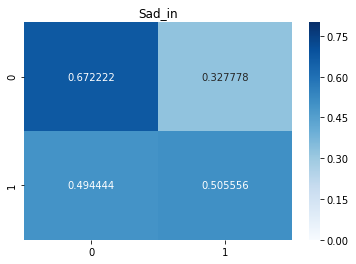

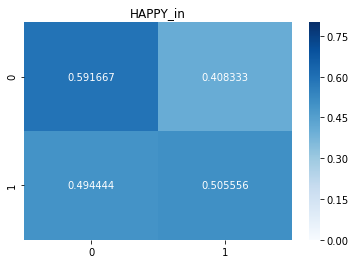

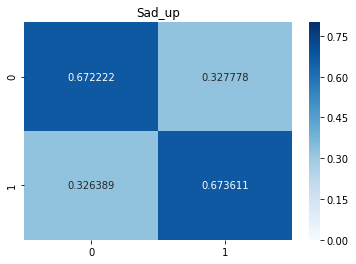

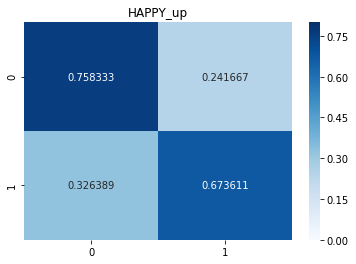

In [11]:
# emo['lure']=emo['affect']=='l'
score_list = []
for up_in, ldf in emo.groupby('up/in'):
    sad=ldf[ldf['affect'].isin(['l', 's'])]
    cm=confusion_matrix(sad['old/new'], sad['response code'])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', vmin=0, vmax=.8)
    plt.title('Sad_'+str(up_in))
    plt.show()
    
    hap=ldf[ldf['affect'].isin(['l', 'h'])]
    cm=confusion_matrix(hap['old/new'], hap['response code'])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', vmin=0, vmax=.8)
    plt.title('HAPPY_'+str(up_in))
    plt.show()
    
    
    srecall=recall_score(sad['old/new'], sad['response code'])
    sprecision=precision_score(sad['old/new'], sad['response code'])
    sf1=f1_score(sad['old/new'], sad['response code'])
    
    hrecall=recall_score(hap['old/new'], hap['response code'])
    hprecision=precision_score(hap['old/new'], hap['response code'])
    hf1=f1_score(hap['old/new'], hap['response code'])
    
    scores={'affect':'Sad','up_in':up_in, 'Recall':srecall, 'Precision':sprecision, 'F1':sf1}
    score_list.append(scores)
    scores={'affect':'Happy','up_in':up_in, 'Recall':hrecall, 'Precision':hprecision, 'F1':hf1}
    score_list.append(scores)
scoresdf=pd.DataFrame(score_list)  

In [12]:
# emo['lure']=emo['affect']=='l'
sub_score_list = []
for sub_upin, ldf in emo.groupby(['Subj','up/in']):
    sub, upin = sub_upin
    sad=ldf[ldf['affect'].isin(['l', 's'])]
    hap=ldf[ldf['affect'].isin(['l', 'h'])]
    
    srecall=recall_score(sad['old/new'], sad['response code'])
    sprecision=precision_score(sad['old/new'], sad['response code'])
    sf1=f1_score(sad['old/new'], sad['response code'])
    
    hrecall=recall_score(hap['old/new'], hap['response code'])
    hprecision=precision_score(hap['old/new'], hap['response code'])
    hf1=f1_score(hap['old/new'], hap['response code'])
    
    scores={'sub':sub, 'affect':'Sad','up_in':upin, 'Recall':srecall, 'Precision':sprecision, 'F1':sf1}
    sub_score_list.append(scores)
    scores={'sub':sub, 'affect':'Happy','up_in':upin, 'Recall':hrecall, 'Precision':hprecision, 'F1':hf1}
    sub_score_list.append(scores)
emo_tidy=pd.DataFrame(sub_score_list)  
emo_tidy.set_index('sub', inplace=True)

In [13]:
emo_tidy['up_in']=emo_tidy['up_in'].map({'in':'Inverted', 'up':'Upright'})


,F1,Precision,Recall,affect,up_in
sub,,,,,
90,0.500000,0.375000,0.750,Sad,Inverted
90,0.363636,0.285714,0.500,Happy,Inverted
90,0.555556,0.500000,0.625,Sad,Upright
90,0.375000,0.375000,0.375,Happy,Upright
92,0.545455,0.428571,0.750,Sad,Inverted
92,0.545455,0.428571,0.750,Happy,Inverted
92,0.421053,0.363636,0.500,Sad,Upright
92,0.636364,0.500000,0.875,Happy,Upright
93,0.615385,0.444444,1.000,Sad,Inverted


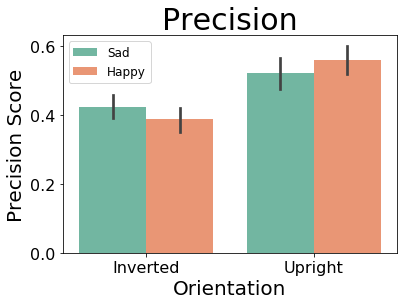

In [25]:
ax=sns.barplot(x='up_in', y='Precision', hue='affect', data=emo_tidy, palette='Set2')
ax.set_xlabel('Orientation', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.tick_params(labelsize=16)
plt.title('Precision', fontsize=30)
plt.gca().legend().set_title('')
plt.legend(fontsize=12)
plt.show()
# sns.barplot(x='up_in', y='recall', hue='affect', data=emo_tidy, palette='Set2')
# plt.title('Recall')
# plt.show()
# sns.barplot(x='up_in', y='f1', hue='affect', data=emo_tidy, palette='Set2')
# plt.title('F1')
# plt.show()

In [ ]:
# P's Reccomended Way to Summarize Trial df --> Subject df
summary_data = []
for group_ids, little_df in emo.groupby(['Subj', 'affect', 'up/in', 'lure']):
#     print(group_ids)
    # do a bunch of calculations
    this_data = {}
    summary_data.append(this_data)
# pd.DataFrame(summary_data)
# little_df

In [13]:
accuracy=emo['response code']==emo['old/new']
emo['accuracy']=accuracy.map({True:1, False:0})
sub_wide=[]
for sub, ldf in emo.groupby(['Subj']):
    sad=ldf[ldf['affect'].isin(['s'])]
    sad_up=sad[sad['up/in'].isin(['up'])]
    sad_in=sad[sad['up/in'].isin(['in'])]
    
    hap=ldf[ldf['affect'].isin(['h'])]
    hap_up=hap[hap['up/in'].isin(['up'])]
    hap_in=hap[hap['up/in'].isin(['in'])]

    lure=ldf[ldf['affect'].isin(['l'])]
    lure_up=lure[lure['up/in'].isin(['up'])]
    lure_in=lure[lure['up/in'].isin(['in'])]
    
    sub_dict={'sub':sub, 'sad_up_hit':sad_up['accuracy'].mean(), 'sad_in_hit':sad_in['accuracy'].mean(), 
          'hap_up_hit':hap_up['accuracy'].mean(), 'hap_in_hit':hap_in['accuracy'].mean(), 
          'lure_up_fa':1-lure_up['accuracy'].mean(), 'lure_in_fa':1-lure_in['accuracy'].mean()}
    
    sub_wide.append(sub_dict)
emo_wide=pd.DataFrame(sub_wide)   
emo_wide.set_index('sub', inplace=True)
emo_wide

,hap_in_hit,hap_up_hit,lure_in_fa,lure_up_fa,sad_in_hit,sad_up_hit
sub,,,,,,
90,0.500,0.375,0.6250,0.3125,0.750,0.625
92,0.750,0.875,0.5000,0.4375,0.750,0.500
93,0.875,0.750,0.6250,0.5000,1.000,0.625
94,0.375,0.750,0.7500,0.3750,0.500,0.250
95,0.750,0.750,0.6250,0.3125,0.625,0.625
96,0.125,0.875,0.2500,0.1875,0.500,0.875
130,0.500,0.625,0.2500,0.3750,0.625,0.875
136,0.875,0.625,0.2500,0.1875,0.875,0.875
147,0.375,0.750,0.6875,0.1250,0.625,0.750


In [19]:
sub_tidy=[]
for row, ldf in emo.groupby(['Subj', 'affect', 'up/in']):
    sub, affect, up_in=row
    if affect=='l':
        measure='fa'
        value=1-ldf['accuracy'].mean()
    else:
        measure='hit'
        value=ldf['accuracy'].mean()
        
    sub_tidy_dict={'sub':sub, 'affect':affect, 'up_in':up_in, 'measure':measure, 'value':value} 
    sub_tidy.append(sub_tidy_dict)
emo_tidy=pd.DataFrame(sub_tidy)   

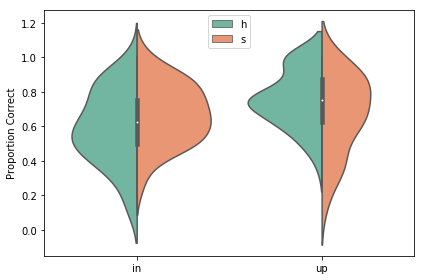

In [22]:
viosplit=sns.violinplot(x="up_in", y="value", hue='affect', split=True, data=emo_tidy[emo_tidy['affect']!='l'], palette="Set2")
plt.xlabel('')
plt.ylabel('Proportion Correct')
plt.tight_layout()
plt.legend(loc='upper center')
# viosplitfig=viosplit.get_figure()
# viosplitfig.savefig('emo_viosplit.png')

In [ ]:
bar=sns.barplot(x="up/in", y="accuracy", hue='affect', data=emo_tidy[emo_tidy['affect']!='l'], palette="Set2")
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Proportion Correct')
plt.tight_layout()

barfig=bar.get_figure()
barfig.savefig('emo_bar.png')

line_x_neg = [-.2, .8]
line_y_neg = [.672222, .672222]

line_x_pos = [.2, 1.2]
line_y_pos = [.591667, .758333]

bar.plot(line_x_pos, line_y_pos, c='orange', alpha=.5)
bar.plot(line_x_neg, line_y_neg, c='green', alpha=.5)

bar.get_xlim()

In [ ]:
sns.factorplot(x="affect", y="accuracy", hue="affect",
               col="up/in", data=emo_tidy[emo_tidy['affect']!='l'], kind="bar", palette='Set2');
sns.factorplot(x="affect", y="accuracy", hue="affect",
               col="up/in", data=emo_tidy[emo_tidy['affect']!='l'], kind="strip", jitter=True, palette='Set2');
plt.title(['Features', 'Whole'])

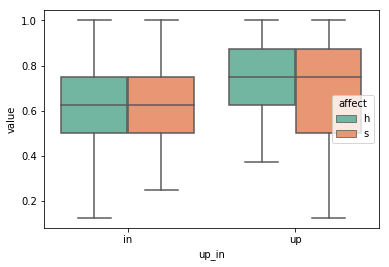

In [31]:
sns.boxplot(x="up_in", y="value", hue='affect', data=emo_tidy[emo_tidy['affect']!='l'], palette="Set2")

(0.5, 0.9)

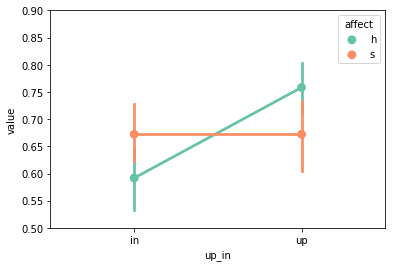

In [29]:
line=sns.pointplot(x="up_in", y="value", hue='affect', jitter=True, data=emo_tidy[emo_tidy['affect']!='l'], palette="Set2", );
plt.ylim([0.5,.9])

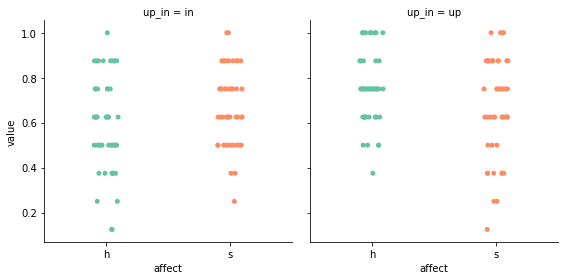

In [32]:
strip=sns.factorplot(x="affect", y="value", hue="affect",
               col="up_in", data=emo_tidy[emo_tidy['affect']!='l'], kind="strip", jitter=True, palette='Set2');

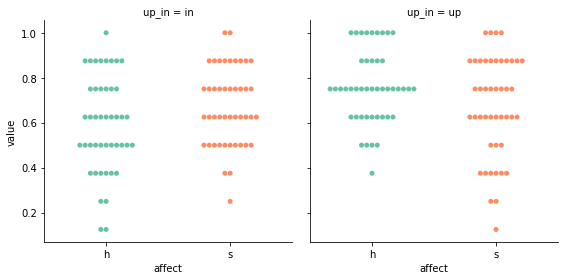

In [33]:
strip=sns.factorplot(x="affect", y="value", hue="affect",
               col="up_in", data=emo_tidy[emo_tidy['affect']!='l'], kind="swarm", palette='Set2');

In [ ]:
barfig=bar.get_figure()
barfig.savefig('emo_bar.png')